In [12]:
import nltk
import re
import pickle

#caso o nltk não esteja instalado execute o comando abaixo
#pip3 install nltk 

from nltk.probability import FreqDist
#nltk.download('gutenberg')

In [34]:
# a utilizacao do metodo nltk.corpus.gutenberg.words foi descartada porque o metodo traz uma seria de caracteres 
# desnecessarios. No lugar, foi usado o metodo raw e foi feito um pre-tratamento

#shake = nltk.corpus.gutenberg.words('shakespeare-hamlet.txt')

class Tratador(object):
    
    def filtrar(self,raw):
        #pre-tratamento
        #substitui 1 ou mais \n por um espaco 
        raw = re.sub('\n+',' ',raw)
        #removendo caracteres irrelevantes ()[]!&.:;?,
        raw = re.sub('\(|\)|\[|\]|\!|\&|\.|\:|\;|\?|\,','',raw)

        texto = raw.split(" ")

        #passagem de filtro para remocao de strings vazias na lista
        texto = list(filter(None,texto))

        #passar todas as palavras para minusculo
        texto = [p.lower() for p in texto]

        return texto

In [35]:
class Preditor(object):
    
    def __init__(self):
        
        self.unigramas = {}
        self.bigramas = {}
        self.palavras = []
    
    #recebe lista de palavras do texto
    def setPalavras(self,lista):
        self.palavras = lista
        #print(self.palavras)
        
    def gerarUnigramas(self):
        self.unigramas = FreqDist(self.palavras)
        
    def gerarBigramas(self):
        
        lista = [p1+' '+p2 for p1,p2 in zip(self.palavras[:-1],self.palavras[1:])]
       
        dicFreq = FreqDist(lista) #contagem para duplas de palavras

        bi = {}

        for w in dicFreq:
            wi = w.split(' ')[0] #pega palavra Wi-1
            bi[w] = round((dicFreq[w]/self.unigramas[wi]), 5)

        self.bigramas = bi
    
    #adicionando mais palavras ao vocabulario
    def addPalavras(self,lista):
        for p in lista:
            self.palavras.append(p)
            
    def fazerPrevisao(self,sequencia):
        
        #pega ultima palavra da lista(sequencia de palavras inserida pelo usuario)
        tam = len(sequencia)
        p = sequencia[tam-1]
        #print(p)
        wAux = self.unigramas[p] #recupera frequencia da ultima palavra inserida pelo usuario
        
        aux = {}
        
        for u in self.unigramas:
            
            try:
                aux[u] = round((self.bigramas[p+" "+u]/self.unigramas[p]),5)
            except KeyError:
                self.bigramas[p+" "+u] = 1
                aux[u] = round((self.bigramas[p+" "+u]/self.unigramas[p]),5)
    
        return aux
        

In [42]:
def criarModelo():
    
    raw = nltk.corpus.gutenberg.raw('shakespeare-hamlet.txt')
    
    # STRING DE TESTE 
    #raw = "minha casa é bonita minha casa é demais minha casa é perfeita minha casa é voraz"
    
    t = Tratador()
    lista = t.filtrar(raw)
    #print(lista)
    
    preditor = Preditor()
    
    #recebendo palavras
    preditor.setPalavras(lista)
    
    #gerando unigramas 
    preditor.gerarUnigramas()
    
    #gerando bigramas
    preditor.gerarBigramas()
    
    #serializando objeto preditor
    pickle.dump(preditor, open('modelo.pkl', 'wb'))


In [43]:
criarModelo()

In [44]:
def main():

    #receber uma sequencia de palavras
    sequencia = input("Digite um sequencia de palavras:")
    
    #tratar sequencia de palavras
    t = Tratador()
    lista = t.filtrar(sequencia)
    #print(lista)
    
    #recuperar objeto preditor
    preditor = pickle.load(open('modelo.pkl','rb'))
    
    preditor.addPalavras(lista)
    
    #atualizando unigramas e bigramas 
    preditor.gerarUnigramas()
    preditor.gerarBigramas()
    
    #fazer predicao
    b = preditor.fazerPrevisao(lista)
    
    #passando dicionario para lista
    l = [(i,j) for i,j in b.items()]
    
    #imprimindo palavra sugerida
    print("A palavra sugerida eh: ",max(l)[0])
    print("Lista como probabilidades")
    print(l)
    
    #serializando objeto com novas alteracoes no modelo
    pickle.dump(preditor, open('modelo.pkl', 'wb'))
    
if __name__ == "__main__":
    main()

Digite um sequencia de palavras:if it
A palavra sugerida eh:  zone
Lista como probabilidades
[('the', 2e-05), ('tragedie', 0.0024), ('of', 0.0024), ('hamlet', 1e-05), ('by', 0.0024), ('william', 0.0024), ('shakespeare', 0.0024), ('1599', 0.0024), ('actus', 0.0024), ('primus', 0.0024), ('scoena', 0.0024), ('prima', 0.0024), ('enter', 1e-05), ('barnardo', 0.0024), ('and', 4e-05), ('francisco', 0.0024), ('two', 0.0024), ('centinels', 0.0024), ("who's", 0.0024), ('there', 0.0024), ('fran', 0.0024), ('nay', 0.0024), ('answer', 0.0024), ('me', 0.0024), ('stand', 0.0024), ('vnfold', 0.0024), ('your', 1e-05), ('selfe', 0.00014), ('bar', 0.0024), ('long', 1e-05), ('liue', 1e-05), ('king', 0.0024), ('he', 0.0024), ('you', 1e-05), ('come', 0.0024), ('most', 0.0024), ('carefully', 0.0024), ('vpon', 0.0024), ('houre', 0.0024), ("'tis", 0.0024), ('now', 1e-05), ('strook', 0.0024), ('twelue', 0.0024), ('get', 0.0024), ('thee', 0.0024), ('to', 3e-05), ('bed', 0.0024), ('for', 3e-05), ('this', 0.0024),

Populating the interactive namespace from numpy and matplotlib


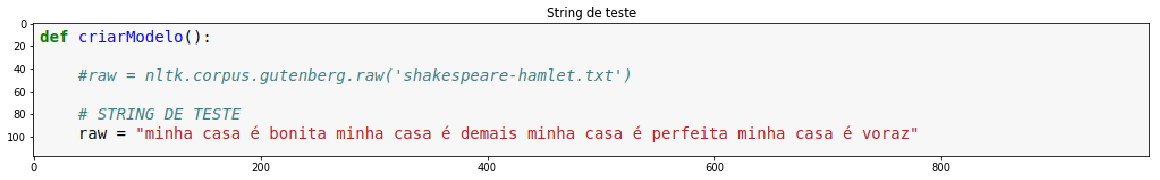

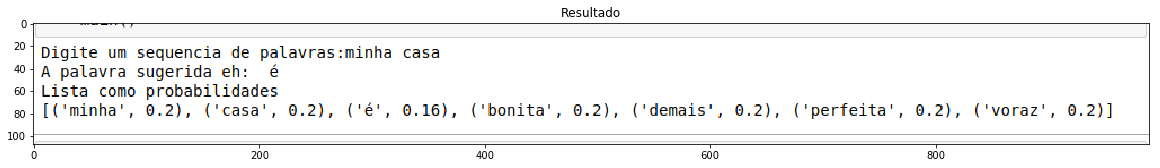

In [46]:
#teste realizado como um texto pequeno e onde conjunto de treino e de teste sao parecidos

%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


img1 = mpimg.imread('teste1.png')
img2 = mpimg.imread('teste2.png')

plt.figure(figsize=(20,20))
plt.title("String de teste")
imgplot = plt.imshow(img1)

plt.figure(figsize=(20,20))
plt.title("Resultado")
imgplot = plt.imshow(img2)